# Polynomial regression

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read csv and save output as numpy array
df = np.loadtxt('housing_price_index.csv', delimiter=',')

In [3]:
# Split feature and target arrays from training dataset
X = df[:, 0].reshape(-1,1)
y = df[:, 1].reshape(-1,1)

## Plot the data in the matrix housing_price_index.

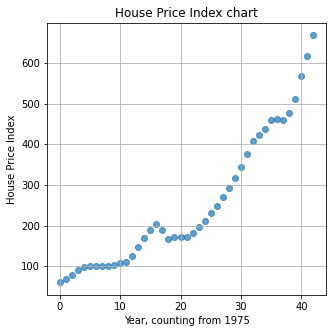

In [4]:
plt.figure(figsize=(5,5))
plt.scatter(X, y, alpha=0.7)
plt.title('House Price Index chart')
plt.xlabel('Year, counting from 1975')
plt.ylabel('House Price Index')
plt.grid(True)

## Polynominal models for degrees 1,2,3,4

In [5]:
# Compute the extended matrixes Xe of matrix X with polynominal model of degrees 1, 2, 3, 4
n = X.shape[0]
Xe_1 = np.c_[np.ones((n,1)),X]
Xe_2 = np.c_[np.ones((n,1)), X, np.power(X, 2)]
Xe_3 = np.c_[np.ones((n,1)), X, np.power(X, 2), np.power(X, 3)]
Xe_4 = np.c_[np.ones((n,1)), X, np.power(X, 2), np.power(X, 3), np.power(X, 4)]

In [6]:
#Implement the Normal Equation to calculate betas for different polynominal degrees
beta_1 = np.linalg.inv((Xe_1.T).dot(Xe_1)).dot(Xe_1.T).dot(y)
beta_2 = np.linalg.inv((Xe_2.T).dot(Xe_2)).dot(Xe_2.T).dot(y)
beta_3 = np.linalg.inv((Xe_3.T).dot(Xe_3)).dot(Xe_3.T).dot(y)
beta_4 = np.linalg.inv((Xe_4.T).dot(Xe_4)).dot(Xe_4.T).dot(y)

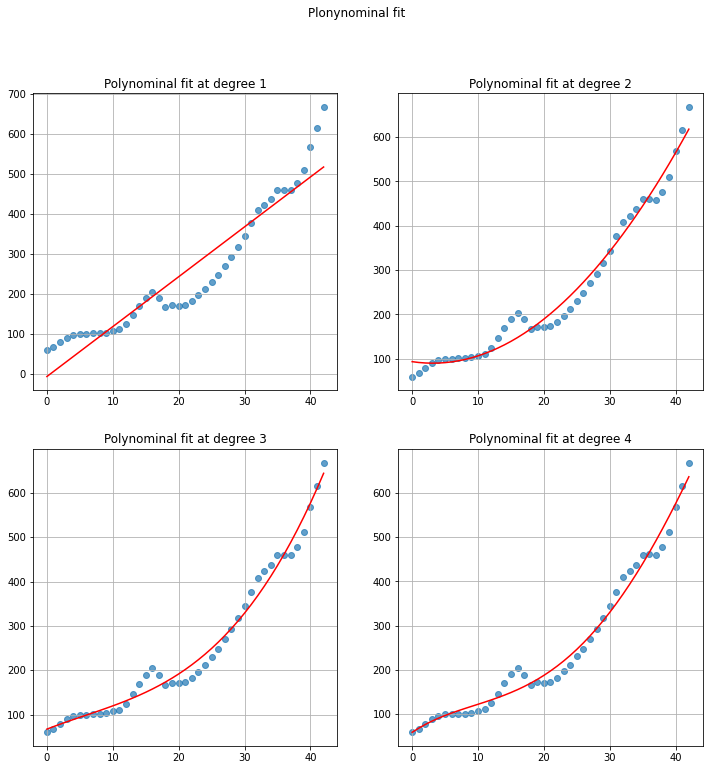

In [7]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12,12))

axs[0, 0].plot(Xe_1.dot(beta_1), 'r')
axs[0, 0].scatter(X, y, alpha=0.7)
axs[0, 0].set(title = 'Polynominal fit at degree 1')
axs[0, 0].grid()

axs[0, 1].plot(Xe_2.dot(beta_2), 'r')
axs[0, 1].scatter(X, y, alpha=0.7)
axs[0, 1].set(title = 'Polynominal fit at degree 2')
axs[0, 1].grid()

axs[1, 0].plot(Xe_3.dot(beta_3), 'r')
axs[1, 0].scatter(X, y, alpha=0.7)
axs[1, 0].set(title = 'Polynominal fit at degree 3')
axs[1, 0].grid()

axs[1, 1].plot(Xe_4.dot(beta_4), 'r')
axs[1, 1].scatter(X, y, alpha=0.7)
axs[1, 1].set(title = 'Polynominal fit at degree 4')
axs[1, 1].grid()

plt.suptitle("Plonynominal fit")
plt.show()

In [8]:
# Calculate Mean Square Error per model to check the model quality
MSE_1 = (Xe_1.dot(beta_1) - y).T.dot((Xe_1.dot(beta_1) - y)) / n
MSE_2 = (Xe_2.dot(beta_2) - y).T.dot((Xe_2.dot(beta_2) - y)) / n
MSE_3 = (Xe_3.dot(beta_3) - y).T.dot((Xe_3.dot(beta_3) - y)) / n
MSE_4 = (Xe_4.dot(beta_4) - y).T.dot((Xe_4.dot(beta_4) - y)) / n

In [9]:
print(f'Mean Square Error for the polynominal model with degree 1 is equal to {round(MSE_1[0,0], 0)}')
print(f'Mean Square Error for the polynominal model with degree 2 is equal to {round(MSE_2[0,0], 0)}')
print(f'Mean Square Error for the polynominal model with degree 3 is equal to {round(MSE_3[0,0], 0)}')
print(f'Mean Square Error for the polynominal model with degree 4 is equal to {round(MSE_4[0,0], 0)}')

Mean Square Error for the polynominal model with degree 1 is equal to 2896.0
Mean Square Error for the polynominal model with degree 2 is equal to 585.0
Mean Square Error for the polynominal model with degree 3 is equal to 455.0
Mean Square Error for the polynominal model with degree 4 is equal to 444.0


Current calculations show that the model with polynominal degree 4 gives the best fit to the given data. <br>
It is important to mention that the training MSE provides the information only on how good the model fits the training data and not nessesarly will provide the best fit on unseen data

## Expected house value in 2022

In [10]:
#Convert year 2022 to current X values
X_test = X[0] + 47

In [29]:
# Calculate house index for year 2022
Xe_4 = np.c_[1, X_test, np.power(X_test, 2), np.power(X_test, 3), np.power(X_test, 4)]
house_index_2022 = np.dot(Xe_4,beta_4)

# define house index for 2015
house_index_2015 = y[40]

# define house price in 2015
house_price_2015 = 2300000

# calculate the expected house price in 2022
house_price_2022 = house_price_2015 * house_index_2022 / house_index_2015
price_increase = (house_price_2022 - house_price_2015) / house_price_2015 * 100
print(f'The expected house value bought in 2015 for {house_price_2015} SEK will be {round(house_price_2022[0,0])} SEK in 2022 which is increase by {round(price_increase[0,0])} %  from the original value')

The expected house value bought in 2015 for 2300000 SEK will be 3236750 SEK in 2022 which is increase by 41 %  from the original value


The current estimate expectes the price increase by 41% in 5 years, which sounds as a reasonable increase in price value based on historic values <br>
https://e24.no/norsk-oekonomi/i/rAMyg0/fra-dette-perspektivet-er-boligprisene-i-oslo-lave